In [1170]:
library(dplyr)
library(ggplot2)

In [1171]:
###### actual old results, to replicate

In [1172]:
file_old = paste0(mydir, "../new/MOFA/MOFA1/summary_endo_eqtl.csv")
df_old = read.csv(file_old, row.names=1)
nrow(df_old)
head(df_old,2)

[1] 4410

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,16,0.21847265,16_81118466_A_G,0.21847265
1,ENSG00000011523_CEP68,2,2,0.00126596,2_65279223_C_T,0.00253192


In [1173]:
#### new "weird" results to check/confirm

In [1174]:
file_new = paste0(mydir, "../April2021/PCA/PC1/summary.csv")
df_new = read.csv(file_new, row.names=1)
nrow(df_new)
head(df_new,2)

[1] 2619

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000011523_CEP68,2,2,0.0006375662,2_65279223_C_T,0.001275132
1,ENSG00000011523_CEP68,2,2,0.0013394110,2_65290842_C_A,0.002678822


In [1175]:
genes_old = unique(df_old$gene)
genes_new = unique(df_new$gene)
length(genes_old)
length(genes_new)

[1] 3180

[1] 1758

In [1176]:
####### debugging on 100 chromosome 1 genes

In [1177]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/"

In [1178]:
list.files(mydir)

[1] "err"                              "mofa_logcounts_model_factors.csv"
 [3] "mofa_logcounts_model.hdf5"        "mofa_weights.csv"                
 [5] "MOFA1"                            "MOFA10"                          
 [7] "new0_PCA_same_background.py"      "new1_PCA_diff_background.py"     
 [9] "new2_MOFA_diff_background_10.py"  "new2_MOFA_diff_background.py"    
[11] "new3_MOFA_same_background.py"     "new4_MOFA_diff_background_10.py" 
[13] "new4_MOFA_diff_background.py"     "old_MOFA_diff_background.py"     
[15] "out"                              "PC1"                             
[17] "PC10"                             "run.py"                          
[19] "summarise.py"

In [1179]:
############################################################
############################################################

In [1409]:
########## new0
file0 = paste0(mydir, "PC1/new0/summary.csv")
df0 = read.csv(file0, row.names=1)
nrow(df0)
head(df0,2)

[1] 161

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000158161_EYA3,3,1,0.02058846,1_28298088_G_C,0.06176539
1,ENSG00000158161_EYA3,3,1,0.01891240,1_28339288_G_A,0.05673720


In [1410]:
#### compare to new new
df1 = inner_join(df0, df_new, by = c("gene","chrom","n_snps","snpID"), suffix = c(".new0",".new"))
nrow(df1)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 112

In [1411]:
cor.test(-log10(df1$pv.new0), -log10(df1$pv.new))


	Pearson's product-moment correlation

data:  -log10(df1$pv.new0) and -log10(df1$pv.new)
t = 497692656, df = 110, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 1 1
sample estimates:
cor 
  1 


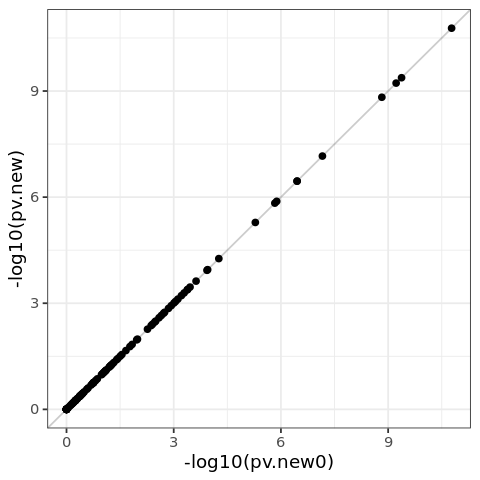

In [1412]:
options(repr.plot.width = 4, repr.plot.height = 4) 
ggplot(df1, aes(x = -log10(pv.new0), y = -log10(pv.new))) + geom_point() + theme_bw() + geom_abline(alpha=0.2)

In [1413]:
#### compare to old old
df2 = inner_join(df0, df_old, by = c("gene","chrom","n_snps","snpID"), suffix = c(".new0",".old"))
nrow(df2)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 161

In [1414]:
cor.test(-log10(df2$pv.new0), -log10(df2$pv.old))


	Pearson's product-moment correlation

data:  -log10(df2$pv.new0) and -log10(df2$pv.old)
t = 8.2199, df = 159, p-value = 6.761e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4275349 0.6461898
sample estimates:
     cor 
0.546097 


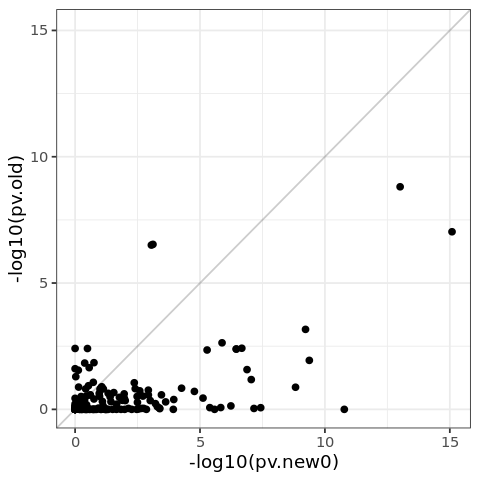

In [1415]:
m = -log10(min(min(df2$pv.new0),min(df2$pv.old)))
ggplot(df2, aes(x = -log10(pv.new0), y = -log10(pv.old))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))

In [1269]:
############################################################
############################################################

In [1270]:
########## old0
file0 = paste0(mydir, "MOFA1/old/summary.csv")
df0 = read.csv(file0, row.names=1)
nrow(df0)
head(df0,2)

[1] 161

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000158161_EYA3,3,1,0.9221985,1_28298088_G_C,1
1,ENSG00000158161_EYA3,3,1,0.9682928,1_28339288_G_A,1


In [1232]:
# genes_chr1_100 = unique(df0$gene)

In [1233]:
#### compare to new new
df1 = inner_join(df0, df_new, by = c("gene","chrom","n_snps","snpID"), suffix = c(".old0",".new"))
nrow(df1)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 112

In [1234]:
length(unique(df1$gene))

[1] 67

In [1190]:
cor.test(-log10(df1$pv.old0), -log10(df1$pv.new))


	Pearson's product-moment correlation

data:  -log10(df1$pv.old0) and -log10(df1$pv.new)
t = 3.4393, df = 110, p-value = 0.0008248
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1337786 0.4699813
sample estimates:
      cor 
0.3115994 


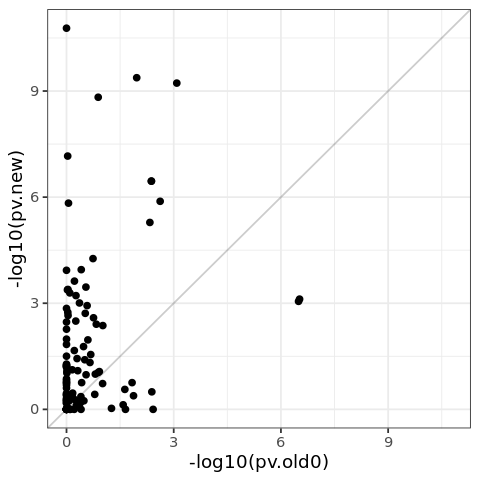

In [1191]:
m = -log10(min(min(df1$pv.old0),min(df1$pv.new)))
ggplot(df1, aes(x = -log10(pv.old0), y = -log10(pv.new))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))

In [1235]:
#### compare to old old
df2 = inner_join(df0, df_old, by = c("gene","chrom","n_snps","snpID"), suffix = c(".old0",".old"))
nrow(df2)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 161

In [1236]:
cor.test(-log10(df2$pv.old0), -log10(df2$pv.old))


	Pearson's product-moment correlation

data:  -log10(df2$pv.old0) and -log10(df2$pv.old)
t = 694.77, df = 159, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9997751 0.9998795
sample estimates:
      cor 
0.9998353 


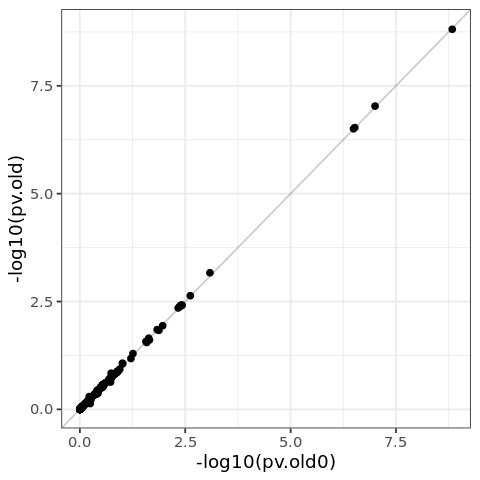

In [1237]:
m = -log10(min(min(df2$pv.old0),min(df2$pv.old)))
ggplot(df2, aes(x = -log10(pv.old0), y = -log10(pv.old))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))

In [1195]:
############################################################
############################################################

In [1196]:
########## new1
file0 = paste0(mydir, "PC1/new1/summary.csv")
df0 = read.csv(file0, row.names=1)
nrow(df0)
head(df0,2)

[1] 161

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000158161_EYA3,3,1,0.07148138,1_28298088_G_C,0.2144441
1,ENSG00000158161_EYA3,3,1,0.06587968,1_28339288_G_A,0.1976390


In [1197]:
#### compare to new new
df1 = inner_join(df0, df_new, by = c("gene","chrom","n_snps","snpID"), suffix = c(".new1",".new"))
nrow(df1)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 112

In [1198]:
cor.test(-log10(df1$pv.new1), -log10(df1$pv.new))


	Pearson's product-moment correlation

data:  -log10(df1$pv.new1) and -log10(df1$pv.new)
t = 5.9666, df = 110, p-value = 3.003e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3401272 0.6228802
sample estimates:
      cor 
0.4944754 


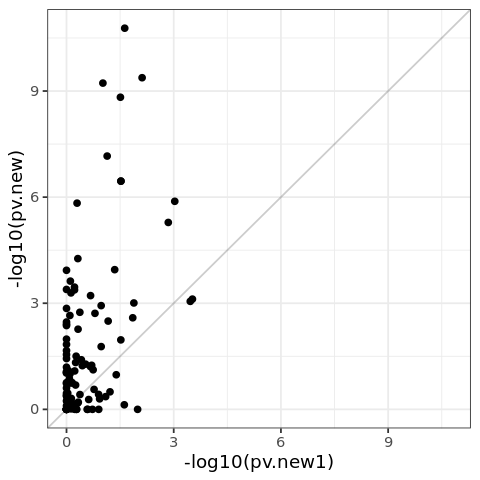

In [1199]:
m = -log10(min(min(df1$pv.new1),min(df1$pv.new)))
ggplot(df1, aes(x = -log10(pv.new1), y = -log10(pv.new))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))

In [1200]:
#### compare to old old
df2 = inner_join(df0, df_old, by = c("gene","chrom","n_snps","snpID"), suffix = c(".new1",".old"))
nrow(df2)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 161

In [1201]:
cor.test(-log10(df2$pv.new1), -log10(df2$pv.old))


	Pearson's product-moment correlation

data:  -log10(df2$pv.new1) and -log10(df2$pv.old)
t = 13.001, df = 159, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6334876 0.7853088
sample estimates:
      cor 
0.7178265 


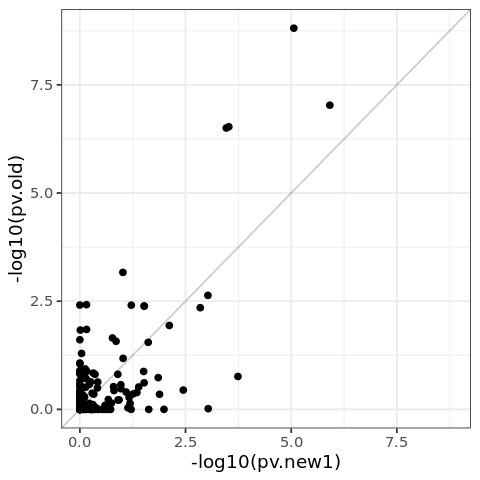

In [1202]:
m = -log10(min(min(df2$pv.new1),min(df2$pv.old)))
ggplot(df2, aes(x = -log10(pv.new1), y = -log10(pv.old))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))

In [1203]:
############################################################
############################################################

In [1444]:
########## new2
file0 = paste0(mydir, "MOFA1/new2/summary.csv")
df0 = read.csv(file0, row.names=1)
df0 = df0[df0$gene %in% genes_chr1_100,]
nrow(df0)
head(df0,2)

[1] 161

,gene,n_snps,chrom,pv_raw,snpID,pv
45,ENSG00000158161_EYA3,3,1,0.9639485,1_28298088_G_C,1
46,ENSG00000158161_EYA3,3,1,0.9926778,1_28339288_G_A,1


In [1445]:
#### compare to new new
df1 = inner_join(df0, df_new, by = c("gene","chrom","n_snps","snpID"), suffix = c(".new2",".new"))
nrow(df1)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 112

In [1446]:
cor.test(-log10(df1$pv.new2), -log10(df1$pv.new))


	Pearson's product-moment correlation

data:  -log10(df1$pv.new2) and -log10(df1$pv.new)
t = 3.2736, df = 110, p-value = 0.00142
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1189703 0.4581738
sample estimates:
      cor 
0.2979487 


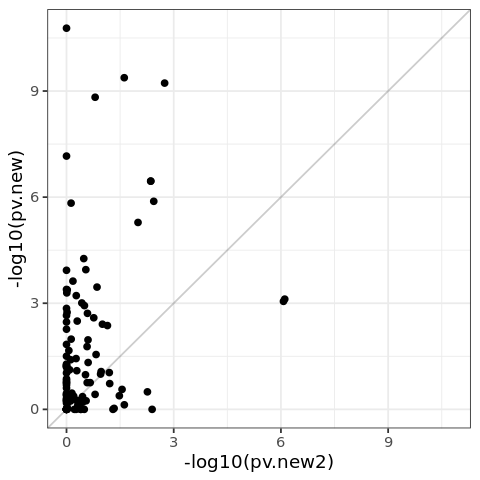

In [1447]:
m = -log10(min(min(df1$pv.new2),min(df1$pv.new)))
ggplot(df1, aes(x = -log10(pv.new2), y = -log10(pv.new))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))

In [1448]:
#### compare to old old
df2 = inner_join(df0, df_old, by = c("gene","chrom","n_snps","snpID"), suffix = c(".new2",".old"))
nrow(df2)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 161

In [1449]:
cor.test(-log10(df2$pv.new2), -log10(df2$pv.old))


	Pearson's product-moment correlation

data:  -log10(df2$pv.new2) and -log10(df2$pv.old)
t = 99.852, df = 159, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9892525 0.9942254
sample estimates:
      cor 
0.9921205 


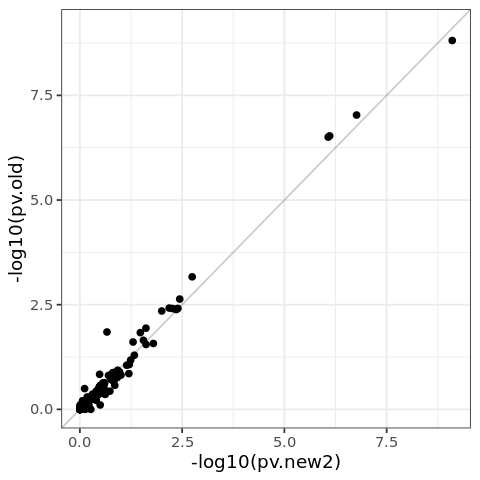

In [1450]:
m = -log10(min(min(df2$pv.new2),min(df2$pv.old)))
ggplot(df2, aes(x = -log10(pv.new2), y = -log10(pv.old))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))

In [1211]:
############################################################
############################################################

In [1212]:
########## new3
file0 = paste0(mydir, "MOFA1/new3/summary.csv")
df0 = read.csv(file0, row.names=1)
nrow(df0)
head(df0,2)

[1] 161

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000158161_EYA3,3,1,0.07130599,1_28298088_G_C,0.2139180
1,ENSG00000158161_EYA3,3,1,0.06449681,1_28339288_G_A,0.1934904


In [1213]:
#### compare to new new
df1 = inner_join(df0, df_new, by = c("gene","chrom","n_snps","snpID"), suffix = c(".new3",".new"))
nrow(df1)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 112

In [1214]:
cor.test(-log10(df1$pv.new3), -log10(df1$pv.new))


	Pearson's product-moment correlation

data:  -log10(df1$pv.new3) and -log10(df1$pv.new)
t = 7.6076, df = 110, p-value = 1.015e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4507076 0.6967977
sample estimates:
      cor 
0.5871585 


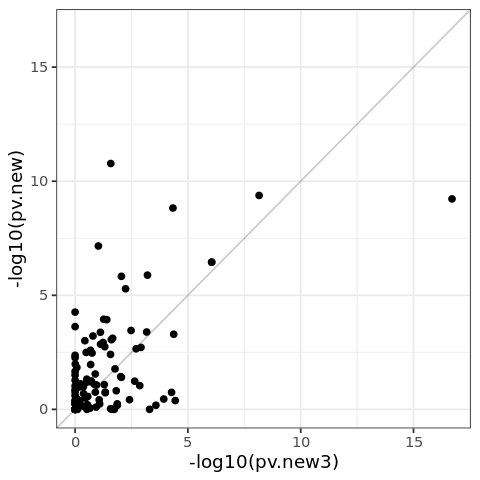

In [1215]:
m = -log10(min(min(df1$pv.new3),min(df1$pv.new)))
ggplot(df1, aes(x = -log10(pv.new3), y = -log10(pv.new))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))

In [1216]:
#### compare to old old
df2 = inner_join(df0, df_old, by = c("gene","chrom","n_snps","snpID"), suffix = c(".new3",".old"))
nrow(df2)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 161

In [1217]:
cor.test(-log10(df2$pv.new3), -log10(df2$pv.old))


	Pearson's product-moment correlation

data:  -log10(df2$pv.new3) and -log10(df2$pv.old)
t = 7.7753, df = 159, p-value = 8.865e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4028952 0.6285122
sample estimates:
      cor 
0.5248618 


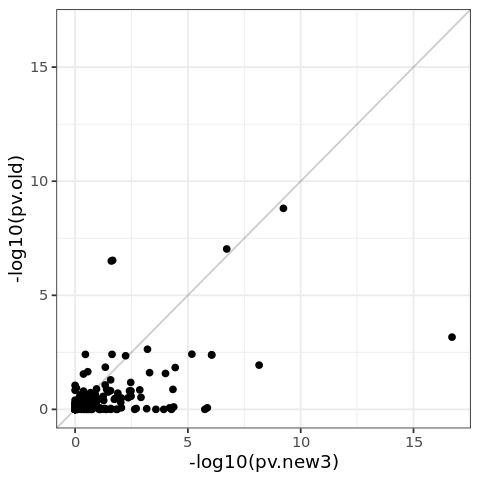

In [1218]:
m = -log10(min(min(df2$pv.new3),min(df2$pv.old)))
ggplot(df2, aes(x = -log10(pv.new3), y = -log10(pv.old))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))

In [1219]:
############################################################
############################################################

In [1435]:
########## new4
file0 = paste0(mydir, "MOFA1/new4/summary.csv")
df0 = read.csv(file0, row.names=1)
df0 = df0[df0$gene %in% genes_chr1_100,]
nrow(df0)
head(df0,2)

[1] 150

,gene,n_snps,chrom,pv_raw,snpID,pv
19,ENSG00000158161_EYA3,3,1,0.6967933,1_28298088_G_C,1
20,ENSG00000158161_EYA3,3,1,0.6911028,1_28339288_G_A,1


In [1436]:
length(unique(df0$gene))

[1] 91

In [1437]:
#### compare to new new
df1 = inner_join(df0, df_new, by = c("gene","chrom","n_snps","snpID"), suffix = c(".new4",".new"))
nrow(df1)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 103

In [1438]:
length(unique(df1$gene))

[1] 60

In [1439]:
cor.test(-log10(df1$pv.new4), -log10(df1$pv.new))


	Pearson's product-moment correlation

data:  -log10(df1$pv.new4) and -log10(df1$pv.new)
t = 3.2057, df = 101, p-value = 0.001804
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1172641 0.4697884
sample estimates:
      cor 
0.3038923 


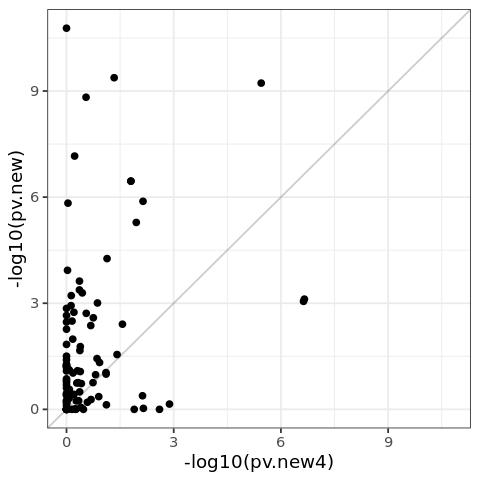

In [1440]:
m = -log10(min(min(df1$pv.new4),min(df1$pv.new)))
ggplot(df1, aes(x = -log10(pv.new4), y = -log10(pv.new))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))

In [1441]:
#### compare to old old
df2 = inner_join(df0, df_old, by = c("gene","chrom","n_snps","snpID"), suffix = c(".new4",".old"))
nrow(df2)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 150

In [1442]:
cor.test(-log10(df2$pv.new4), -log10(df2$pv.old))


	Pearson's product-moment correlation

data:  -log10(df2$pv.new4) and -log10(df2$pv.old)
t = 33.873, df = 148, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9195807 0.9570530
sample estimates:
      cor 
0.9411428 


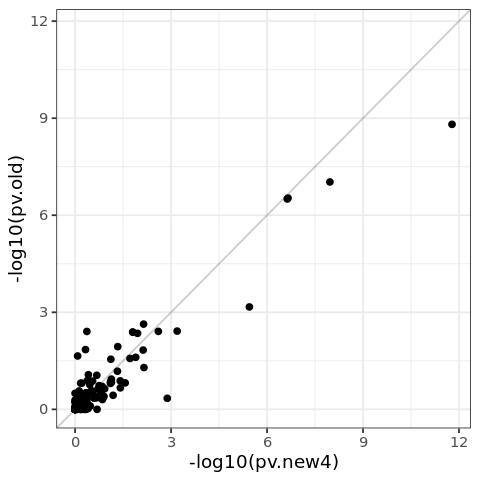

In [1443]:
m = -log10(min(min(df2$pv.new4),min(df2$pv.old)))
ggplot(df2, aes(x = -log10(pv.new4), y = -log10(pv.old))) + geom_point() + theme_bw() + 
    geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))